In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
creditData = pd.read_csv("Cars-dataset.csv")
print(creditData.head())
X = creditData.drop("Opt_service", axis = 1)
y = creditData.pop("Opt_service")
X= pd.get_dummies(X, columns = ['Gender'],drop_first = True)


   Age  Gender  Engineer  MBA  Work Exp  Salary  Distance  license  \
0   28    Male         1    0         5    14.4       5.1        0   
1   24    Male         1    0         6    10.6       6.1        0   
2   27  Female         1    0         9    15.5       6.1        0   
3   25    Male         0    0         1     7.6       6.3        0   
4   25  Female         0    0         3     9.6       6.7        0   

   Opt_service  
0            0  
1            0  
2            0  
3            0  
4            0  


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(292, 8)
(292,)
(126, 8)
(126,)


In [48]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1", (2*(metrics.precision_score(y_train,pred_train) * metrics.recall_score(y_train,pred_train))/(metrics.precision_score(y_train,pred_train) + metrics.recall_score(y_train,pred_train))))
    
    return score_list # returning the list with train and test scores
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  0.9178082191780822
Accuracy on test set :  0.9126984126984127
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0
F1 nan
Accuracy on training set :  1.0
Accuracy on test set :  0.9523809523809523
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6923076923076923
F1 1.0
Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143
F1 1.0


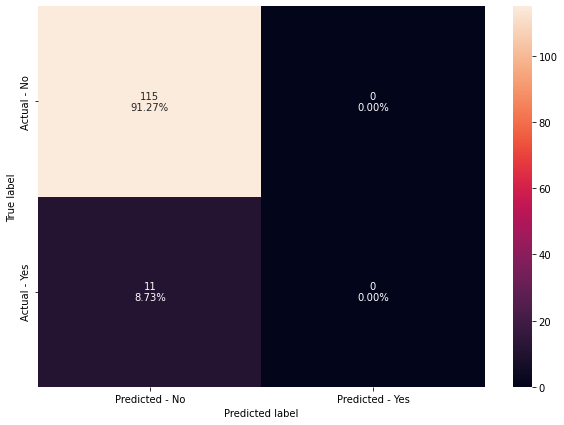

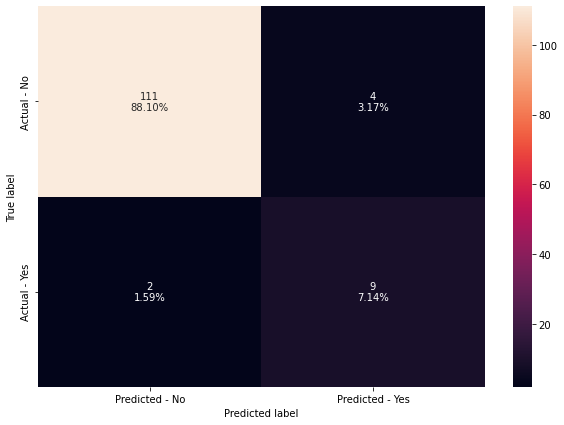

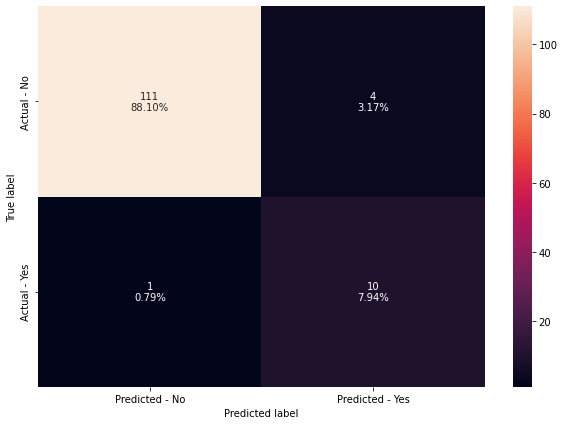

In [49]:
gbc1 = GradientBoostingClassifier(n_estimators=50, learning_rate=.01, random_state=1)
gbc1.fit(X_train,y_train)
get_metrics_score(gbc1)
make_confusion_matrix(gbc1,y_test,labels=[1, 0])

gbc2 = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, random_state=1)
gbc2.fit(X_train,y_train)
get_metrics_score(gbc2,flag=True)
make_confusion_matrix(gbc2,y_test,labels=[1, 0])

gbc3 = GradientBoostingClassifier(n_estimators=400, learning_rate=.01, random_state=1)
gbc3.fit(X_train,y_train)
get_metrics_score(gbc3,flag=True)
make_confusion_matrix(gbc3,y_test,labels=[1, 0])


In [57]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)
get_metrics_score(gbc,flag=True)


Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143
F1 1.0


[1.0, 0.9603174603174603, 1.0, 0.9090909090909091, 1.0, 0.7142857142857143]

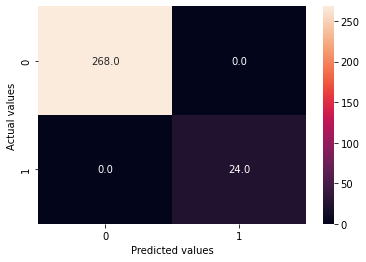

In [58]:

abc =  AdaBoostClassifier(random_state=1)

abc.fit(X_train, y_train)

abc_predict = abc.predict(X_train)

sns.heatmap(confusion_matrix(y_train,abc_predict),annot=True,fmt='.1f')

plt.xlabel('Predicted values')

plt.ylabel('Actual values')

plt.show()